In [31]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from settings import e
from IPython.display import display
from data_handler import DataHandler
from prediction import Prediction
from settings_for_ml import map_weights
from settings import e

pd.options.display.max_columns = 100
np.set_printoptions(threshold=np.nan)
dh = DataHandler()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load data 

In [32]:
#df = pd.read_csv("../training_data_1_16155-25_shape.csv", index_col=0)
#../training_data_cratedensity0_shape_18714-25.csv
# df = pd.read_csv("../training_data_cratedensity0_shape_18714-25.csv", index_col=0)
df_balanced = pd.read_csv("../training_data_createdensity0_balanced_15696-33_shape.csv", index_col=0)
df = pd.read_csv("../training_data_createdensity0_19660-33_shape.csv", index_col=0)

print(df.shape)
print(df_balanced.shape)
#  ../training_data_createdensity0_balanced_15696-29_shape.csv

(19660, 33)
(15696, 33)


In [33]:
df_balanced.head()

ACTIVE_AGENTS  COIN_POTENTIAL_DOWN  COIN_POTENTIAL_LEFT  \
0              3            14.358909            13.444268   
1              4            14.731314            16.397981   
2              2            10.289506             9.654585   
3              4            21.881674            19.143939   
4              2            17.720843            18.554176   

   COIN_POTENTIAL_RIGHT  COIN_POTENTIAL_UP  CURRENT_SCORE  \
0             16.999665          15.906453              0   
1             12.939977          12.939977              0   
2             11.761570          11.126649              1   
3             17.952381          16.881313              0   
4             15.232367          16.899034              0   

   DANGER_LEVEL_CENTER  DANGER_LEVEL_DOWN  DANGER_LEVEL_LEFT  \
0                -8.25             -11.75              -1.25   
1                 0.00               0.00               0.00   
2                -5.00              -0.75              -0.75   
3                -9.50              -2.00              -5.00   
4                -8.25              -7.50              -1.25   

   DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  \
0               -2.50            -7.50         3         0          0       3   
1                0.00             0.00         2         2          0       0   
2               -9.50            -0.75         2         0          2       2   
3               -5.75            -2.00         0         3          4       0   
4               -1.25           -10.50         2         2          0       2   

   IMPROVEMENT_TARGET_5  MAX_COIN_POTENTIAL_DOWN  MAX_COIN_POTENTIAL_LEFT  \
0                    -1                        0                        0   
1                    -1                        0                        1   
2                    -1                        0                        0   
3                    -1                        1                        0   
4                    -1                        0                        1   

   MAX_COIN_POTENTIAL_RIGHT  MAX_COIN_POTENTIAL_UP  MAX_STEP            NAME  \
0                         1                      0        18  random_agent_3   
1                         0                      0         7  random_agent_2   
2                         1                      0        30  random_agent_2   
3                         0                      0        19  random_agent_1   
4                         0                      0        35  random_agent_1   

   NEXT_EVENT_BOMB  NEXT_EVENT_DOWN  NEXT_EVENT_LEFT  NEXT_EVENT_RIGHT  \
0                0                0                0                 0   
1                1                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 1   
4                0                0                0                 0   

   NEXT_EVENT_UP  NEXT_EVENT_WAIT  NEXT_SCORE  STEP  WINNER   X   Y  
0              0                1           0    17       0   1  12  
1              0                0           0     2       0  15   1  
2              0                1           1    27       0   1  11  
3              0                0           0    16       0   2   3  
4              0                1           0    34       0  15   3

In [34]:
df.columns

Index(['ACTIVE_AGENTS', 'COIN_POTENTIAL_DOWN', 'COIN_POTENTIAL_LEFT',
       'COIN_POTENTIAL_RIGHT', 'COIN_POTENTIAL_UP', 'CURRENT_SCORE',
       'DANGER_LEVEL_CENTER', 'DANGER_LEVEL_DOWN', 'DANGER_LEVEL_LEFT',
       'DANGER_LEVEL_RIGHT', 'DANGER_LEVEL_UP', 'DOF_DOWN', 'DOF_LEFT',
       'DOF_RIGHT', 'DOF_UP', 'IMPROVEMENT_TARGET_5',
       'MAX_COIN_POTENTIAL_DOWN', 'MAX_COIN_POTENTIAL_LEFT',
       'MAX_COIN_POTENTIAL_RIGHT', 'MAX_COIN_POTENTIAL_UP', 'MAX_STEP', 'NAME',
       'NEXT_EVENT_BOMB', 'NEXT_EVENT_DOWN', 'NEXT_EVENT_LEFT',
       'NEXT_EVENT_RIGHT', 'NEXT_EVENT_UP', 'NEXT_EVENT_WAIT', 'NEXT_SCORE',
       'STEP', 'WINNER', 'X', 'Y'],
      dtype='object')

In [35]:
to_drop = ["X", "Y", "NAME", "CURRENT_SCORE", "NEXT_SCORE", "MAX_STEP", "WINNER", "STEP"] 
target = "IMPROVEMENT_TARGET_5"

In [36]:
print("shape: ", df.shape)
for i in df.columns: 
    print(i)

shape:  (19660, 33)
ACTIVE_AGENTS
COIN_POTENTIAL_DOWN
COIN_POTENTIAL_LEFT
COIN_POTENTIAL_RIGHT
COIN_POTENTIAL_UP
CURRENT_SCORE
DANGER_LEVEL_CENTER
DANGER_LEVEL_DOWN
DANGER_LEVEL_LEFT
DANGER_LEVEL_RIGHT
DANGER_LEVEL_UP
DOF_DOWN
DOF_LEFT
DOF_RIGHT
DOF_UP
IMPROVEMENT_TARGET_5
MAX_COIN_POTENTIAL_DOWN
MAX_COIN_POTENTIAL_LEFT
MAX_COIN_POTENTIAL_RIGHT
MAX_COIN_POTENTIAL_UP
MAX_STEP
NAME
NEXT_EVENT_BOMB
NEXT_EVENT_DOWN
NEXT_EVENT_LEFT
NEXT_EVENT_RIGHT
NEXT_EVENT_UP
NEXT_EVENT_WAIT
NEXT_SCORE
STEP
WINNER
X
Y


In [37]:
df.drop([i for i in df.columns if i.startswith("COIN_POT")], axis=1, inplace=True)
df_balanced.drop([i for i in df_balanced.columns if i.startswith("COIN_POT")], axis=1, inplace=True)

In [38]:
max_depth=20
p1 = Prediction(df, 
               classifier_name="RandomForestClassifier", 
               target=target, to_drop=to_drop, max_depth=max_depth)

In [ ]:
p1.features


Index(['ACTIVE_AGENTS', 'DANGER_LEVEL_CENTER', 'DANGER_LEVEL_DOWN',
       'DANGER_LEVEL_LEFT', 'DANGER_LEVEL_RIGHT', 'DANGER_LEVEL_UP',
       'DOF_DOWN', 'DOF_LEFT', 'DOF_RIGHT', 'DOF_UP',
       'MAX_COIN_POTENTIAL_DOWN', 'MAX_COIN_POTENTIAL_LEFT',
       'MAX_COIN_POTENTIAL_RIGHT', 'MAX_COIN_POTENTIAL_UP', 'NEXT_EVENT_BOMB',
       'NEXT_EVENT_DOWN', 'NEXT_EVENT_LEFT', 'NEXT_EVENT_RIGHT',
       'NEXT_EVENT_UP', 'NEXT_EVENT_WAIT'],
      dtype='object')

In [ ]:
# all data
p1.evaluate_model()

In [ ]:
print(df_balanced.shape)

In [ ]:
# balanced prediction
max_depth=30
p2 = Prediction(df_balanced,
                classifier_name="RandomForestClassifier",
                target=target, to_drop=to_drop, max_depth=max_depth)
# balanced data 
p2.evaluate_model()

In [18]:
p2.save_model(name="../randomforestregressor.pickle")

save model in file ../randomforestregressor.pickle


In [19]:
p2.model.feature_importances_

array([0.17995473, 0.16244249, 0.07795417, 0.0831104 , 0.09029441,
       0.08172297, 0.0208111 , 0.01985399, 0.01974129, 0.01986027,
       0.01339569, 0.01331884, 0.01303522, 0.01372527, 0.07305131,
       0.01163795, 0.0113682 , 0.01246376, 0.01194343, 0.07031452])

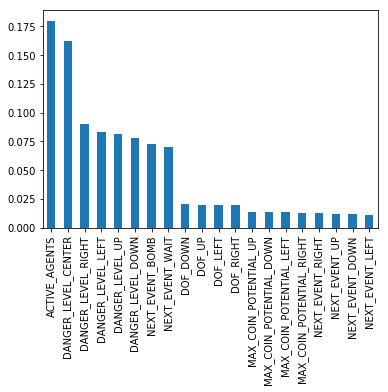

In [20]:
feat_importances = pd.Series(p2.model.feature_importances_, index=p2.features)
feat_importances.sort_values(ascending=False).plot(kind='bar')

In [21]:
feat_importances.sort_values(ascending=False)

ACTIVE_AGENTS               0.179955
DANGER_LEVEL_CENTER         0.162442
DANGER_LEVEL_RIGHT          0.090294
DANGER_LEVEL_LEFT           0.083110
DANGER_LEVEL_UP             0.081723
DANGER_LEVEL_DOWN           0.077954
NEXT_EVENT_BOMB             0.073051
NEXT_EVENT_WAIT             0.070315
DOF_DOWN                    0.020811
DOF_UP                      0.019860
DOF_LEFT                    0.019854
DOF_RIGHT                   0.019741
MAX_COIN_POTENTIAL_UP       0.013725
MAX_COIN_POTENTIAL_DOWN     0.013396
MAX_COIN_POTENTIAL_LEFT     0.013319
MAX_COIN_POTENTIAL_RIGHT    0.013035
NEXT_EVENT_RIGHT            0.012464
NEXT_EVENT_UP               0.011943
NEXT_EVENT_DOWN             0.011638
NEXT_EVENT_LEFT             0.011368
dtype: float64

In [22]:
print(p2.y_test.iloc[[0]])
p2.X_test.iloc[[0]]

1270    0
Name: IMPROVEMENT_TARGET_5, dtype: int64


ACTIVE_AGENTS  DANGER_LEVEL_CENTER  DANGER_LEVEL_DOWN  \
1270              2                -0.25                0.0   

      DANGER_LEVEL_LEFT  DANGER_LEVEL_RIGHT  DANGER_LEVEL_UP  DOF_DOWN  \
1270                0.0                -2.0              0.0         2   

      DOF_LEFT  DOF_RIGHT  DOF_UP  MAX_COIN_POTENTIAL_DOWN  \
1270         2          2       2                        0   

      MAX_COIN_POTENTIAL_LEFT  MAX_COIN_POTENTIAL_RIGHT  \
1270                        1                         0   

      MAX_COIN_POTENTIAL_UP  NEXT_EVENT_BOMB  NEXT_EVENT_DOWN  \
1270                      0                0                1   

      NEXT_EVENT_LEFT  NEXT_EVENT_RIGHT  NEXT_EVENT_UP  NEXT_EVENT_WAIT  
1270                0                 0              0                0

In [23]:
p2.model.predict_proba(p2.X_test.iloc[[0]])
#p2.model.predict(p2.X_test.iloc[[0]])

array([[0.06850197, 0.93149803, 0.        ]])

In [24]:
X = pd.read_csv("../X.csv", index_col=0)
X

ACTIVE_AGENTS  COMFORT_LEVEL_CENTER  COMFORT_LEVEL_DOWN  \
0              2                 -0.25              -0.125   
1              2                 -0.25              -0.125   
2              2                 -0.25              -0.125   
3              2                 -0.25              -0.125   
4              2                 -0.25              -0.125   
5              2                 -0.25              -0.125   

   COMFORT_LEVEL_LEFT  COMFORT_LEVEL_RIGHT  COMFORT_LEVEL_UP  DOF_DOWN  \
0              -2.375                 -2.0            -0.125         3   
1              -2.375                 -2.0            -0.125         3   
2              -2.375                 -2.0            -0.125         3   
3              -2.375                 -2.0            -0.125         3   
4              -2.375                 -2.0            -0.125         3   
5              -2.375                 -2.0            -0.125         3   

   DOF_LEFT  DOF_RIGHT  DOF_UP  NEXT_EVENT_BOMB  NEXT_EVENT_DOWN  \
0         0          0       3                0                0   
1         0          0       3                0                0   
2         0          0       3                0                0   
3         0          0       3                0                1   
4         0          0       3                1                0   
5         0          0       3                0                0   

   NEXT_EVENT_LEFT  NEXT_EVENT_RIGHT  NEXT_EVENT_UP  NEXT_EVENT_WAIT  STEP  
0                1                 0              0                0    24  
1                0                 0              1                0    24  
2                0                 1              0                0    24  
3                0                 0              0                0    24  
4                0                 0              0                0    24  
5                0                 0              0                1    24

In [25]:
#prediction = p2.model.predict_proba(X)
#prediction

In [26]:
low_risk_actions = np.where(prediction[:,0]<0.3)
print(low_risk_actions)
#prediction2 = prediction[np.where(prediction[:,0]<0.3)]
action_index = low_risk_actions[0][np.argmax(prediction[low_risk_actions][:,2])]

NameError: name 'prediction' is not defined

In [ ]:
p2.features

In [ ]:
np.argmax(prediction)

In [27]:
# p2.model.predict(p2.X_test)
#x = p1.X.sample(200)
from sklearn.metrics import mean_absolute_error
pred = p1.model.predict(p2.X_test)
mean_absolute_error(p2.y_test, pred)

0.36602316602316604

mean_absolute_error train-error: 0.057436
mean_squared_error train-error: 0.066946
Confusion matrix for train-data


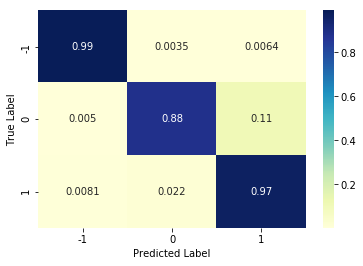

mean_absolute_error test-error: 0.173359
mean_squared_error test-error: 0.236293
Confusion matrix for test-data


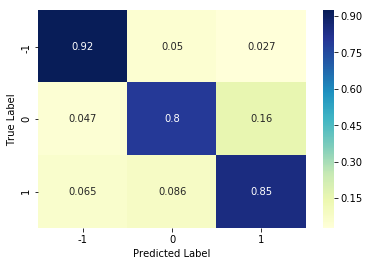

In [28]:
p2.evaluate_model()

## evaluate predicitons between different improvement targets
- false positive and true positive -> confusion matrix

In [29]:
df = pd.read_csv("../training_data_1.csv", index_col=0)
df.head()

ACTIVE_AGENTS  COMFORT_LEVEL_CENTER  COMFORT_LEVEL_DOWN  \
0              4                -0.250               -0.25   
1              4                -0.250               -2.00   
2              4                -0.125               -0.25   
3              4                -0.250                0.00   
4              4                 0.000               -0.25   

   COMFORT_LEVEL_LEFT  COMFORT_LEVEL_RIGHT  COMFORT_LEVEL_UP  CURRENT_SCORE  \
0               0.750               -2.375            -2.375              0   
1              -0.125               -0.250            -2.375              0   
2              -0.250               -0.250            -2.375              1   
3              -2.000               -2.000            -0.125              1   
4              -0.250               -0.250            -0.250              1   

   DOF_DOWN  DOF_LEFT  DOF_RIGHT  DOF_UP  IMPROVEMENT_TARGET_5  MAX_STEP  \
0         2         2          0       0                     1       121   
1         0         3          2       0                     1       121   
2         2         2          2       0                     0       121   
3         4         0          0       3                     0       121   
4         2         2          2       2                     0       121   

             NAME  NEXT_EVENT_BOMB  NEXT_EVENT_DOWN  NEXT_EVENT_LEFT  \
0  simple_agent_0              0.0                0                1   
1  simple_agent_0              0.0                0                1   
2  simple_agent_0              0.0                1                0   
3  simple_agent_0              0.0                1                0   
4  simple_agent_0              0.0                1                0   

   NEXT_EVENT_RIGHT  NEXT_EVENT_UP  NEXT_EVENT_WAIT  NEXT_SCORE  STEP  WINNER  \
0                 0              0                0           0     0       0   
1                 0              0                0           1     1       0   
2                 0              0                0           1     2       0   
3                 0              0                0           1     3       0   
4                 0              0                0           1     4       0   

    X  Y  
0  15  1  
1  14  1  
2  13  1  
3  13  2  
4  13  3

In [30]:
df

ACTIVE_AGENTS  COMFORT_LEVEL_CENTER  COMFORT_LEVEL_DOWN  \
0                 4                -0.250              -0.250   
1                 4                -0.250              -2.000   
2                 4                -0.125              -0.250   
3                 4                -0.250               0.000   
4                 4                 0.000              -0.250   
5                 4                -0.250               0.000   
6                 4                 0.000              -0.250   
7                 4                -0.250              -2.000   
8                 4                 0.000              -0.250   
9                 4                -0.250              -1.000   
10                4                 0.000              -0.250   
11                4                -0.250               0.000   
12                4                 0.000              -0.250   
13                4                -0.250              -2.000   
14                4                 0.000              -0.250   
15                4                -0.250               0.000   
16                4                 0.000              -0.250   
17                4                -0.250              -2.000   
18                4                 0.000              -0.250   
19                4                -0.250               0.000   
20                4                 0.000              -0.250   
21                4                -0.250              -2.000   
22                4                 0.000              -0.250   
23                4                -0.250               0.000   
24                4                -2.500              -3.250   
25                4                -1.000              -2.750   
26                4                -5.000              -6.250   
27                4                -1.500              -3.250   
28                4                -7.500              -9.250   
29                4                -3.250              -5.000   
...             ...                   ...                 ...   
7007              4                -7.500              -3.375   
7008              4                -8.500              -3.625   
7009              4                -9.500              -3.875   
7010              4                -0.250              -2.375   
7011              4                -0.125              -2.375   
7012              4                -0.250              -2.375   
7013              4                -0.125              -0.250   
7014              4                -0.125              -0.250   
7015              4                -0.125              -0.250   
7016              4                -0.250              -2.375   
7017              4                -0.250              -2.375   
7018              4                -0.125              -0.250   
7019              4                -0.125              -0.250   
7020              4                -0.250              -2.375   
7021              4                -0.125              -0.250   
7022              4                -0.250              -2.375   
7023              4                -0.250              -2.375   
7024              4                -0.125              -2.375   
7025              4                -0.125              -2.375   
7026              4                -0.250              -2.375   
7027              3                -0.125              -2.375   
7028              3                -0.125              -2.375   
7029              3                -0.125              -2.375   
7030              3                -0.125              -2.375   
7031              3                -0.125              -2.375   
7032              3               -13.625              -5.625   
7033              3                -6.500              -3.125   
7034              3                -7.500              -3.375   
7035              3                -8.500              -3.625   
7036              1                -1.625

In [ ]:
# p = Prediction()